# Candidate Datasets for CSCE 676 Project

## Dataset 1: MovieLens 25M Dataset

**Dataset name and source:** MovieLens 25M Dataset – GroupLens Research (University of Minnesota) https://grouplens.org/datasets/movielens/25m/

**Course topic alignment:** Frequent itemset mining; association rule mining; recommender systems

**Potential beyond-course techniques:** Sequential pattern mining; graph-based recommendation; neural collaborative filtering; contrastive learning

**Dataset size and structure:** Approximately 25 million ratings from ~162,000 users on ~62,000 movies; relational tables

**Data types:** User IDs; movie IDs; numeric ratings; timestamps; free-text tags
Target variable(s): Rating value (supervised); none for unsupervised frequent itemset mining

**Licensing or usage constraints:** Free for academic research; non-commercial use under GroupLens license

## Dataset 2: Steam Reviews and User–Game Interaction Dataset

Dataset name and source: Steam Reviews and User–Game Interaction Dataset – UCSD / Steam  https://cseweb.ucsd.edu/~jmcauley/datasets.html#steam_reviews

Course topic alignment: Graph mining (user–game bipartite graphs); frequent itemsets; text mining

Potential beyond-course techniques: Graph neural networks; temporal interaction modeling; transformer-based review embeddings; cold-start recommendation

Dataset size and structure: Approximately 7 million reviews from ~1.3 million users across ~50,000 games; JSON/CSV format

Data types: User IDs; game IDs; review text; playtime; binary recommendation flag; timestamps

Target variable(s): Recommendation flag; playtime (regression); none for unsupervised mining

Licensing or usage constraints: Research and educational use; attribution required; non-commercial redistribution

## Dataset 3: NASA Exoplanet Archive

Dataset name and source: NASA Exoplanet Archive – NASA / IPAC https://exoplanetarchive.ipac.caltech.edu/

Course topic alignment: Clustering; anomaly detection; time-series mining

Potential beyond-course techniques: Autoencoder-based anomaly detection; Bayesian clustering; time-series representation learning; outlier explanation

Dataset size and structure: Tens of thousands of confirmed and candidate exoplanets; tabular data with optional time-series light curves

Data types: Continuous numerical features; categorical discovery methods; confidence scores; time-series flux measurements

Target variable(s): None (unsupervised discovery); optional planet confirmation status

Licensing or usage constraints: Public domain U.S. Government data; no restrictions on academic use


# Comparative Analysis of Datasets

## MovieLens 25M

### Supported data mining tasks

The dataset supports frequent itemset / association rule mining by treating each user’s positively rated movies as a transaction (rating ≥ 4.0), and supports sequential / temporal mining using timestamps. Beyond course techniques include sequential pattern mining on per-user timelines and graph-based recommenders on the user–movie interaction graph.

### Data quality issues

The dataset has no missing values in core fields (0% missing for userId, movieId, rating, timestamp), but interactions are incomplete because unobserved user–movie pairs may reflect non-exposure rather than dislike. The user–item matrix is highly sparse given 162,541 users and 59,047 movies, with large variation in user activity (ratings per user up to 32,202).

### Algorithmic feasibility

Apriori is only feasible with pruning: with rating ≥ 4.0 there are 162,342 transactions and 40,858 unique items, and positive basket sizes are large (median 40, 95th percentile 261, max 5,525), which can cause candidate explosion at low minsup. Sequential pattern mining is feasible only with sequence truncation or sampling due to long-tailed per-user histories, while graph methods are tractable on a single machine at this scale.

### Bias considerations

The dataset shows strong popularity bias and engagement bias: ratings per movie are extremely long-tailed (median 6 vs max 81,491; mean/median ≈ 70.6), and ratings per user are also skewed (median 71 vs max 32,202; mean/median ≈ 2.17). Temporal skew is present (max monthly volume ≈ 5.21× the median month), meaning certain periods dominate the data.

### Ethical considerations

Ethical risk is low due to anonymized user identifiers, but recommendation results may reinforce popularity bias and underrepresent niche movies. There are no direct power-dynamics concerns (e.g., employer–employee), but downstream use should acknowledge representation skew toward highly active raters.

## Steam Reviews & User–Game Interaction Dataset

### Supported data mining tasks

The dataset supports graph mining through a user–game bipartite graph and text mining via free-text reviews. Beyond course techniques include node embeddings or graph neural networks on the interaction graph and topic modeling over the review corpus.

### Data quality issues

Reviews capture only voluntary user feedback, resulting in missing interactions. Review text is highly noisy due to informal language and short comments, and the user–game graph is sparse and long-tailed, with many low-degree nodes.

### Algorithmic feasibility

Apriori is not well-suited due to the lack of natural multi-item transactions. Graph and text analyses are feasible on sampled data using single-machine tools, while full-scale graph processing may require more scalable frameworks.

### Bias considerations

The dataset exhibits engagement bias, with highly active users contributing a disproportionate number of reviews, as well as temporal skew, where review activity is concentrated in recent periods.

### Ethical considerations

Ethical risks are low due to anonymized, public data; however, analyses may overrepresent highly engaged players, potentially reinforcing dominant viewpoints.

## NASA Exoplanet Archive

### Supported data mining tasks

The dataset supports clustering and anomaly detection using many continuous physical parameters (76 numeric columns across 39,315 planets/records). Beyond course techniques include autoencoder-based anomaly detection and Bayesian/mixture-model clustering using multi-feature uncertainty-aware representations.

### Data quality issues

The dataset contains substantial missingness in many scientific measurements and uncertainty fields (e.g., pl_eqterr1 and pl_eqterr2 ~93.5% missing; orbital eccentricity error fields ~90.5% missing; several mass-related fields ~81.9% missing). This reflects real observational limitations and creates uneven feature availability across records.

### Algorithmic feasibility

At 39,315 rows and 92 columns, clustering and anomaly detection are computationally feasible on a single machine without distributed tooling. However, missingness may require imputation, feature selection, or model choices robust to partially observed data.

### Bias considerations

The dataset likely exhibits detection/selection bias because discovery is constrained by measurement methods and instrumentation (captured in discoverymethod, disc_facility, and the strong missingness patterns). Temporally, discovery year is concentrated in recent decades (median 2016; 99th percentile 2025), indicating modern survey dominance.

### Ethical considerations

Ethical concerns are minimal because the data is public, scientific, and non-personal, with no direct social power dynamics. The main “ethics-style” caution is interpretability and responsible communication of uncertainty when many parameters are missing or estimated.

# Dataset Selection — MovieLens 25M

## Reasons

Directly supports frequent itemsets / association rules (course) by treating each user’s positively rated movies (e.g., rating ≥ 4.0) as a transaction; this yields 162,342 transactions and 40,858 items in your setup.

Supports sequential / temporal mining (external) using timestamps, enabling comparisons between unordered co-preference patterns and ordered viewing/rating behavior.

Provides a clean, well-structured schema (25,000,095 ratings; 162,541 users; 59,047 movies) with strong long-tail effects, making it ideal for studying sparsity and popularity bias in recommender-style data.

## Trade-offs

Candidate explosion risk for Apriori due to large positive basket sizes (median 40; 95th percentile 261; max 5,525), requiring careful pruning (minsup filtering, item filtering, max itemset length).

Limited natural free-text component compared to Steam reviews, so topic modeling / NLP analyses are not central unless augmented with external text metadata.

User–movie interactions reflect implicit missingness (unrated ≠ disliked), which complicates evaluation and introduces exposure-related bias.

# Exploratory Data Analysis

## Code

In [1]:
import os
import gzip
import ast
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv



MOVIELENS: BASIC SHAPE/COLUMNS
ratings shape: (25000095, 4)
ratings columns: ['userId', 'movieId', 'rating', 'timestamp']

movies shape: (62423, 3)
movies columns: ['movieId', 'title', 'genres']

MISSINGNESS (top columns)
userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

MOVIELENS: CORE COUNTS
Unique users: 162541
Unique movies: 59047
Ratings value counts (top 10):
rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

DESCRIBE: ratings_per_user
count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
50%          71.000000
90%         353.000000
95%         554.000000
99%        1228.000000
max       32202.000000
dtype: float64

Mean/Median ratio: 2.166


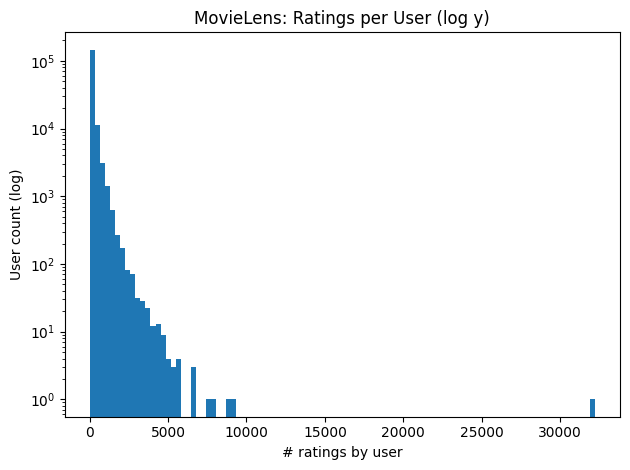


DESCRIBE: ratings_per_movie
count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
50%          6.000000
90%        413.000000
95%       1503.400000
99%       9941.620000
max      81491.000000
dtype: float64

Mean/Median ratio: 70.566


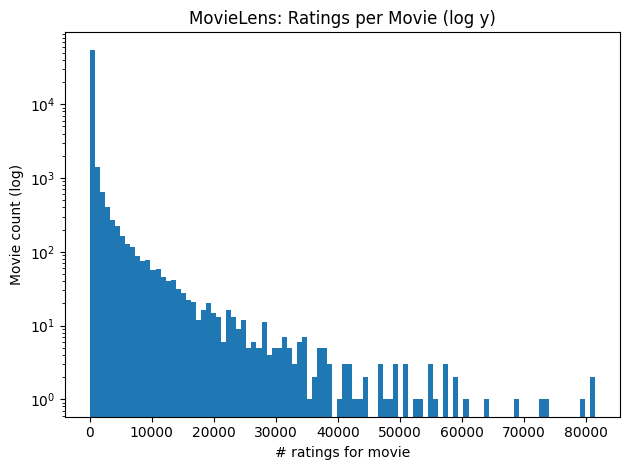


MOVIELENS: TEMPORAL SKEW (ratings per month)
Null/invalid timestamps: 0 / 25000095
count       287.000000
mean      87108.344948
std       54939.227075
min           3.000000
25%       54491.000000
50%       76950.000000
75%      111709.500000
max      400997.000000
dtype: float64
Max/Median month ratio (rough skew indicator): 5.211


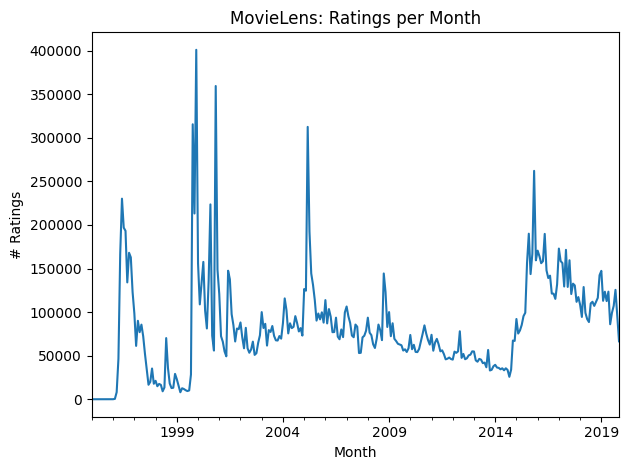


MOVIELENS: APRIORI FEASIBILITY PROXIES (rating >= 4.0)
Transactions (users with >=1 positive rating): 162342
Unique items (movies with >=1 positive rating): 40858

DESCRIBE: positive_basket_size_per_user
count    162342.000000
mean         76.707266
std         109.462737
min           1.000000
50%          40.000000
90%         177.000000
95%         261.000000
99%         524.000000
max        5525.000000
Name: movieId, dtype: float64

Mean/Median ratio: 1.918

Top 10 users by positive basket size:
userId
75309     5525
72315     4733
110971    3215
92046     2910
24869     2817
24610     2581
20055     2495
80974     2374
78616     2248
85757     2201
Name: movieId, dtype: int64


In [3]:
# ----------------------------
# Helpers
# ----------------------------
def _print_header(title: str):
    print("\n" + "=" * 80)
    print(title)
    print("=" * 80)

def _safe_series_desc(s: pd.Series, name: str = ""):
    s = s.dropna()
    _print_header(f"DESCRIBE: {name}")
    if s.empty:
        print("Series is empty after dropping NaNs.")
        return
    print(s.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))
    try:
        mean = float(s.mean())
        median = float(s.median())
        if median != 0:
            print(f"\nMean/Median ratio: {mean/median:.3f}")
        else:
            print("\nMedian is 0; Mean/Median ratio undefined.")
    except Exception:
        pass

def _missingness_table(df: pd.DataFrame, top_k: int = 15):
    _print_header("MISSINGNESS (top columns)")
    miss = df.isna().mean().sort_values(ascending=False)
    print(miss.head(top_k))

def _date_basic(df: pd.DataFrame, date_col: str):
    _print_header(f"DATE PARSING CHECK: {date_col}")
    if date_col not in df.columns:
        print(f"Column '{date_col}' not found.")
        return None
    dt = pd.to_datetime(df[date_col], errors="coerce")
    nulls = dt.isna().sum()
    print(f"Null/invalid dates: {nulls} / {len(dt)} ({nulls/len(dt):.3%})")
    print("Min date:", dt.min())
    print("Max date:", dt.max())
    return dt

# ----------------------------
# Diagnostics
# ----------------------------
def analyze_movielens(ratings: pd.DataFrame,
                      movies: pd.DataFrame | None = None,
                      rating_threshold: float = 4.0):
    _print_header("MOVIELENS: BASIC SHAPE/COLUMNS")
    print("ratings shape:", ratings.shape)
    print("ratings columns:", list(ratings.columns))

    if movies is not None:
        print("\nmovies shape:", movies.shape)
        print("movies columns:", list(movies.columns))

    _missingness_table(ratings, top_k=15)

    _print_header("MOVIELENS: CORE COUNTS")
    if "userId" in ratings.columns:
        print("Unique users:", ratings["userId"].nunique())
    if "movieId" in ratings.columns:
        print("Unique movies:", ratings["movieId"].nunique())
    if "rating" in ratings.columns:
        print("Ratings value counts (top 10):")
        print(ratings["rating"].value_counts().head(10))

    if "userId" in ratings.columns:
        user_activity = ratings.groupby("userId").size()
        _safe_series_desc(user_activity, "ratings_per_user")

        plt.figure()
        user_activity.plot(kind="hist", bins=100, log=True)
        plt.title("MovieLens: Ratings per User (log y)")
        plt.xlabel("# ratings by user")
        plt.ylabel("User count (log)")
        plt.tight_layout()
        plt.show()

    if "movieId" in ratings.columns:
        movie_pop = ratings.groupby("movieId").size()
        _safe_series_desc(movie_pop, "ratings_per_movie")

        plt.figure()
        movie_pop.plot(kind="hist", bins=100, log=True)
        plt.title("MovieLens: Ratings per Movie (log y)")
        plt.xlabel("# ratings for movie")
        plt.ylabel("Movie count (log)")
        plt.tight_layout()
        plt.show()

    if "timestamp" in ratings.columns:
        _print_header("MOVIELENS: TEMPORAL SKEW (ratings per month)")
        ts = pd.to_datetime(ratings["timestamp"], unit="s", errors="coerce")
        print("Null/invalid timestamps:", ts.isna().sum(), "/", len(ts))

        per_month = ratings.assign(_dt=ts).groupby(ts.dt.to_period("M")).size().sort_index()
        print(per_month.describe())
        if len(per_month) > 0:
            ratio = per_month.max() / max(per_month.median(), 1)
            print(f"Max/Median month ratio (rough skew indicator): {ratio:.3f}")

            plt.figure()
            per_month.plot()
            plt.title("MovieLens: Ratings per Month")
            plt.xlabel("Month")
            plt.ylabel("# Ratings")
            plt.tight_layout()
            plt.show()

    if {"userId", "movieId", "rating"}.issubset(ratings.columns):
        _print_header(f"MOVIELENS: APRIORI FEASIBILITY PROXIES (rating >= {rating_threshold})")
        pos = ratings[ratings["rating"] >= rating_threshold]
        basket_sizes = pos.groupby("userId")["movieId"].nunique()

        print("Transactions (users with >=1 positive rating):", basket_sizes.shape[0])
        print("Unique items (movies with >=1 positive rating):", pos["movieId"].nunique())
        _safe_series_desc(basket_sizes, "positive_basket_size_per_user")

        print("\nTop 10 users by positive basket size:")
        print(basket_sizes.sort_values(ascending=False).head(10))


ratings = pd.read_csv("ratings.csv")
movies  = pd.read_csv("movies.csv")
analyze_movielens(ratings, movies, rating_threshold=4.0)

## Analysis

### Distribution of basket sizes

Basket sizes were defined as the number of positively rated movies per user (rating ≥ 4.0). The distribution is strongly right-skewed, with a median basket size of 40, a 95th percentile of 261, and a maximum of 5,525 movies for a single user. This long-tailed behavior indicates substantial variation in user engagement and suggests that naïve frequent itemset mining may suffer from candidate explosion without pruning.

### Frequency of top items

Item popularity is extremely skewed. While the median movie receives only 6 ratings, the most popular movie has 81,491 ratings, yielding a mean-to-median ratio of ~70.6. This confirms a heavy popularity bias where a small subset of movies dominates the interaction data, motivating techniques that go beyond raw frequency counts.

### Sparsity of item co-occurrence

Despite the large dataset size (162,541 users and 59,047 movies), the user–movie interaction matrix is highly sparse. Most users interact with a tiny fraction of available items, and most item pairs never co-occur within a single user’s basket. This sparsity limits the usefulness of high-order itemsets and motivates dimensionality-reduction or graph-based approaches.

### Temporal gaps between transactions

Ratings are unevenly distributed over time, with clear temporal skew. Monthly rating counts show a maximum-to-median ratio of approximately 5.2, indicating bursts of activity in specific periods. Additionally, user timelines vary greatly in length, suggesting irregular temporal gaps between interactions and motivating sequential or time-aware modeling.

### Initial observations motivating external techniques

The combination of large, skewed basket sizes, extreme popularity imbalance, high sparsity, and temporal clustering suggests limitations of classic Apriori-style analysis. These properties motivate external techniques such as sequential pattern mining, graph-based recommendation methods, and temporal models that can better capture ordering effects and long-tail structure.

# Initial Insights and Direction

## Initial observations

The distribution of item popularity is highly skewed: most movies receive very few ratings (median 6), while a small number dominate the dataset (up to 81,491 ratings), indicating extreme long-tail behavior.

Positive basket sizes are large and variable (median 40; 95th percentile 261), suggesting that frequent itemset mining may be sensitive to support thresholds and prone to candidate explosion.

Temporal analysis shows clustered activity over time (max monthly volume ≈ 5.2× median), indicating that user behavior is not temporally uniform.

## Hypotheses

High minimum support thresholds will disproportionately favor popular movies and miss meaningful but infrequent co-preference patterns.

Sequential or time-aware methods will uncover structure in user behavior that unordered frequent itemsets fail to capture due to sparsity and temporal skew.

## Potential research questions

How do different minimum support thresholds affect the number, diversity, and interpretability of association rules?

To what extent do sequential patterns reveal consistent viewing or rating behaviors that are absent in unordered frequent itemsets?

How does incorporating temporal order change the representation of user preferences compared to static basket-based analysis?

# Collabaration Declaration

## Collabarators
N/A

## Web Sources
Mlxtend Apriori (Python):
https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

PrefixSpan (Sequential Pattern Mining):
https://github.com/chuanconggao/PrefixSpan-py

PyTorch Geometric (Graph Neural Networks):
https://pytorch-geometric.readthedocs.io/

Popularity Bias in Recommendation (RecSys);
https://dl.acm.org/doi/10.1145/3298689.3346990

Modeling Temporal Dynamics of User Preferences:
https://dl.acm.org/doi/10.1145/1401890.1401944

## AI Tools

ChatGpt:
Used to assist with formatting and presenting data analysis, as well as interpreting relationships within the data to support written observations and insights.

## Citations

Järv, P. (2019). Predictability limits in session-based next item recommendation.
Proceedings of the 13th ACM Conference on Recommender Systems (RecSys ’19), 146–150.
https://doi.org/10.1145/3298689.3346990

Koren, Y. (2008). Factorization meets the neighborhood: A multifaceted collaborative filtering model.
Proceedings of the 14th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD ’08), 426–434.
https://doi.org/10.1145/1401890.1401944